# Benchmarking
The purpose of this notebook is to benchmark the performance of see-classify on the Wisconsin Breast Cancer dataset.

In [1]:
from figures_markdown_snippets import show_data_instructions

show_data_instructions()


To generate data, run:
- for sklearn
    ```bash
sbatch generate_sklearn_data.sb -n 10 -p 10
    ```
- for dhahri
    ```bash
sbatch generate_dhahri_data.sb -n 20 -p 100 -t 30
    ```
These commands generate files for running genetic search using 10 generations and population size of 10
for the sklearn tutorial and 20 generations with population size of 100
for the Breast Cancer Wisconsin (Diagnostic) Dataset respectively.

The `-n`, `-p`, `-t` flags control number of generations, population sizes, 
and number of trials respectively.

The data generated tracks the top 10 individuals and the population by
each generation and is stored in the corresponding output 
(i.e. the slurm_\[id\].out file).

To extract this data to a csv file, run:
- for the top 10 individuals:
    ```bash
grep "# GEN HOF_index" slurm_[id].out | cut -d '|' -f2 > "filename_1.csv"
    ```
- for the population:
    ```bash
grep "# GEN population_index" slurm_[id].out | cut -d '|' -f2 > "filename_2.csv"
    ```
    
If one has multiple output files that contain different trials of the same
type of GA run, one could try the moving all the relevant files into 
one directory, changing to that directory, and running the following commands instead:
- for the top 10 individuals:
    ```bash
grep "# GEN HOF_index" *.out | cut -d '|' -f2 > "filename_1.csv"
    ```
- for the population:
    ```bash
grep "# GEN population_index" *.out | cut -d '|' -f2 > "filename_2.csv"
    ```


Set data file names.

In [2]:
# Path hack so that we can import see library.
import sys, os
sys.path.insert(0, os.path.abspath('..'))

In [3]:
# Set data files path names
hof_dataset = f"../0727_dhahri_simple_data/dhahri_2019_hof_20_10.csv"
population_dataset = f"../0727_dhahri_simple_data/dhahri_2019_population_20_10.csv"

In [4]:
import pandas as pd
import numpy as np
from figures_helpers import benchmark_generation_fitness, plot_generation_fitness

# Set details about data file
num_gen = 20
pop_size = 10
num_trials = 30
hof_size = 10

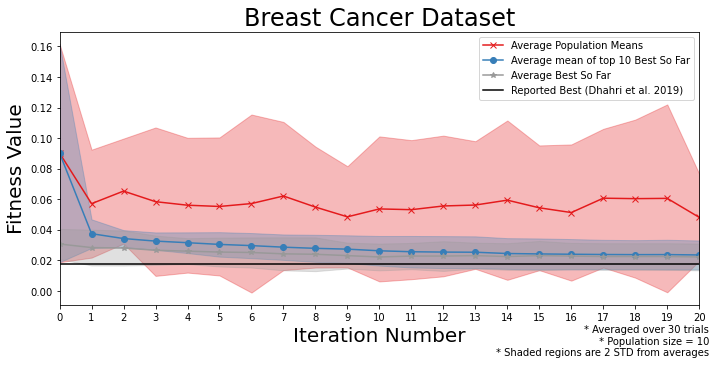

In [5]:
# Plot figure
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(10, 5))

plot_generation_fitness(
    population_dataset,
    hof_dataset,
    num_gen,
    pop_size,
    num_trials,
    hof_size,
    axs
)

# Plot reported best
generations = list(range(num_gen + 1))

axs.plot(
    generations,
    np.repeat(1 - 0.9824, num_gen + 1),
    "k-",
    label="Reported Best (Dhahri et al. 2019)",
)

# Recreate legend
axs.legend()

# Annotate figure

plt.figtext(
    0.99,
    0.0,
    "* Averaged over 30 trials\n * Population size = 10\n* Shaded regions are 2 STD from averages",
    horizontalalignment="right",
)

plt.tight_layout()

In [6]:
# Set data filenames for populations of 25, 50, 75, 100 in an array
# in increasing order.

hof_datasets = [
    f"../0727_dhahri_simple_data/dhahri_2019_hof_20_25.csv",
    f"../0727_dhahri_simple_data/dhahri_2019_hof_20_50.csv",
    f"../0727_dhahri_simple_data/dhahri_2019_hof_20_75.csv",
    f"../0727_dhahri_simple_data/dhahri_2019_hof_20_100.csv"
]

population_datasets = [
    f"../0727_dhahri_simple_data/dhahri_2019_population_20_25.csv",
    f"../0727_dhahri_simple_data/dhahri_2019_population_20_50.csv",
    f"../0727_dhahri_simple_data/dhahri_2019_population_20_75.csv",
    f"../0727_dhahri_simple_data/dhahri_2019_population_20_100.csv",
]

In [7]:
import pandas as pd
import numpy as np

# Set details about GA runs
num_gen = 20
num_trials = 30
hof_size = 10

# Initialize matrices to hold data for each file
# Each row in each matrix corresponds to one file

matrix_means_of_means = np.zeros((4, num_gen + 1))
matrix_std_sample_means = np.zeros((4, num_gen + 1))
matrix_hof_means_of_means = np.zeros((4, num_gen + 1))
matrix_hof_std_sample_means = np.zeros((4, num_gen + 1))
matrix_hof_means_of_mins = np.zeros((4, num_gen + 1))
matrix_hof_std_of_mins = np.zeros((4, num_gen + 1))

# Extract data
for k in range(4):
    pop_size = (k + 1) * 25

    (
        means_of_means,
        std_sample_means,
        hof_means_of_means,
        hof_std_sample_means,
        hof_means_of_mins,
        hof_std_of_mins,
    ) = benchmark_generation_fitness(
        population_datasets[k],
        hof_datasets[k],
        num_gen,
        pop_size,
        num_trials,
        hof_size,
    )
    
    matrix_means_of_means[k] = means_of_means
    matrix_std_sample_means[k] = std_sample_means
    matrix_hof_means_of_means[k] = hof_means_of_means
    matrix_hof_std_sample_means[k] = hof_std_sample_means
    matrix_hof_means_of_mins[k] = hof_means_of_mins
    matrix_hof_std_of_mins[k] = hof_std_of_mins

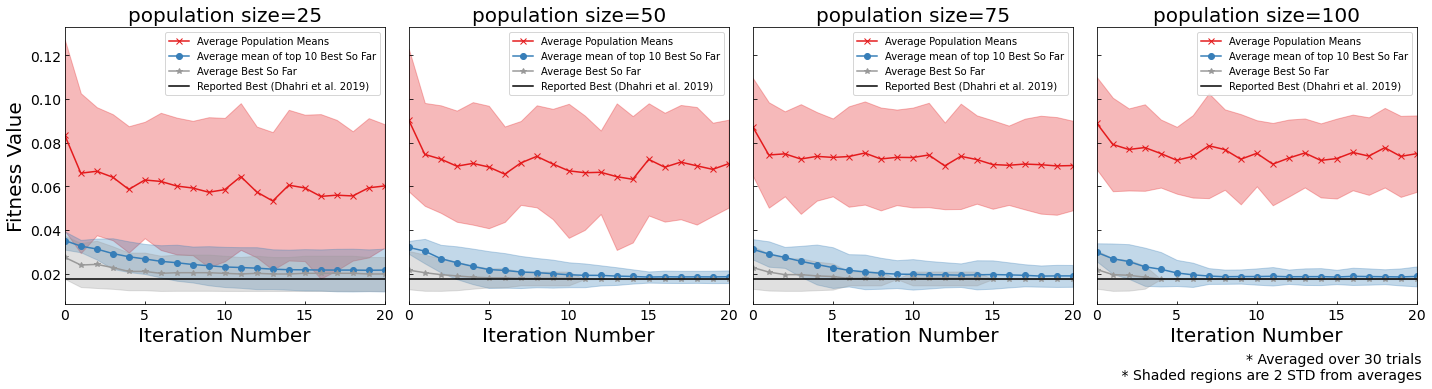

In [8]:
# Plot data
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(20, 5))

for i in range(4):
    pop_size = (i + 1) * 25

    plot_generation_fitness(
        population_datasets[i],
        hof_datasets[i],
        num_gen,
        pop_size,
        num_trials,
        hof_size,
        axs=axs[i],
    )

    axs[i].set_title(f"population size={25*(i+1)}", fontdict={"fontsize": 20})

    # Plot reported best
    generations = list(range(num_gen + 1))

    axs[i].plot(
        generations,
        np.repeat(1 - 0.9824, num_gen + 1),
        "k-",
        label="Reported Best (Dhahri et al. 2019)",
    )

    # Remove ylabel
    if i != 0:
        axs[i].set_ylabel('')
    
    # Recreate legend
    axs[i].legend()

    # Set ticks
    upper_bound = 20
    axs[i].set_xticks(np.linspace(0, upper_bound, num=5))
    
    axs[i].tick_params(which="both", direction="in", labelsize=14)


plt.xlim(0, upper_bound)

plt.figtext(
    0.99,
    -0.065,
    "* Averaged over 30 trials\n * Shaded regions are 2 STD from averages",
    horizontalalignment="right",
    fontdict={"fontsize": 14},
)

plt.tight_layout()